In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.subplots as sp
import altair as alt
import random
from IPython.display import display, HTML
from matplotlib.colors import LinearSegmentedColormap
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Data types and non-null counts
df=pd.read_csv("/kaggle/input/nfl-big-data-bowl-2025/games.csv")
print("Data types and non-null counts:\n", df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136 entries, 0 to 135
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   gameId             136 non-null    int64 
 1   season             136 non-null    int64 
 2   week               136 non-null    int64 
 3   gameDate           136 non-null    object
 4   gameTimeEastern    136 non-null    object
 5   homeTeamAbbr       136 non-null    object
 6   visitorTeamAbbr    136 non-null    object
 7   homeFinalScore     136 non-null    int64 
 8   visitorFinalScore  136 non-null    int64 
dtypes: int64(5), object(4)
memory usage: 9.7+ KB
Data types and non-null counts:
 None


In [3]:
# Verify unique gameId values to ensure no duplicates
print("Unique game IDs:", df['gameId'].nunique())

Unique game IDs: 136


In [4]:
min_gameid=df["gameId"].min()
print("The Minimum Game id of the players according to this Dataset is:", min_gameid)
max_gameid=df["gameId"].max()
print("The Maximum Game id of the players according to this Dataset is:", max_gameid)

The Minimum Game id of the players according to this Dataset is: 2022090800
The Maximum Game id of the players according to this Dataset is: 2022110700


In [5]:
min_season=df["season"].min()
print("The Minimum Game season for the players according to this Dataset is:", min_season)
max_season=df["season"].max()
print("The Maximum Game season for the players according to this Dataset is:", max_season)

The Minimum Game season for the players according to this Dataset is: 2022
The Maximum Game season for the players according to this Dataset is: 2022


In [6]:
# Get the unique seasons and teams
unique_seasons = df['season'].unique()
unique_teams = df['homeTeamAbbr'].unique()

# Get the first and last game dates
first_game_date = df['gameDate'].min()  # Assuming 'gameDate' column contains the game date
last_game_date = df['gameDate'].max()

# Print the first and last game dates
print("The data spans from the first game on", first_game_date, "to the last game on", last_game_date)

The data spans from the first game on 10/10/2022 to the last game on 9/8/2022


In [7]:
# 홈 팀이 이긴 경기
home_wins = df[df['homeFinalScore'] > df['visitorFinalScore']]

# 방문 팀이 이긴 경기
visitor_wins = df[df['homeFinalScore'] < df['visitorFinalScore']]

# 홈 팀과 방문 팀 각각의 승리 횟수 계산
home_win_counts = home_wins['homeTeamAbbr'].value_counts()
visitor_win_counts = visitor_wins['visitorTeamAbbr'].value_counts()

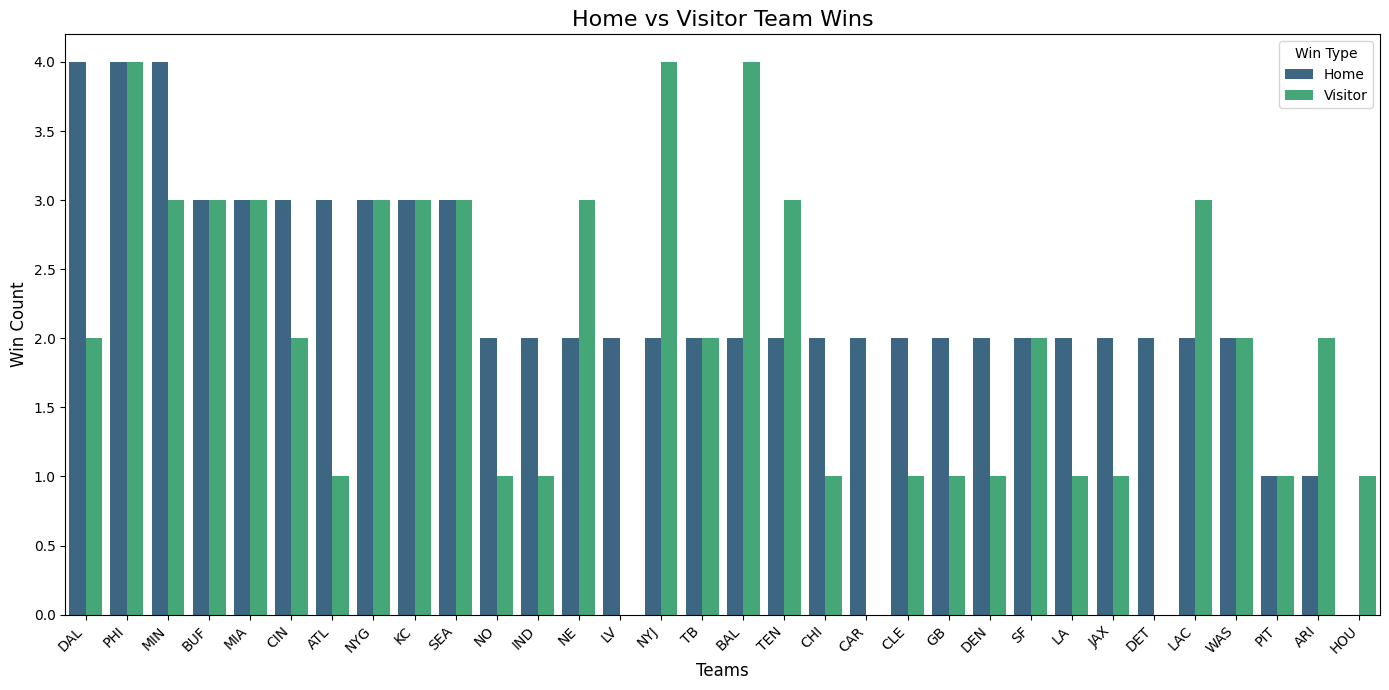

In [8]:
import pandas as pd
import seaborn as sns

# 데이터를 하나의 데이터프레임으로 병합
home_win_df = pd.DataFrame({'Team': home_win_counts.index, 'Wins': home_win_counts.values, 'Type': 'Home'})
visitor_win_df = pd.DataFrame({'Team': visitor_win_counts.index, 'Wins': visitor_win_counts.values, 'Type': 'Visitor'})
win_data = pd.concat([home_win_df, visitor_win_df])

# 시각화
plt.figure(figsize=(14, 7))
sns.barplot(x='Team', y='Wins', hue='Type', data=win_data, palette='viridis')

# 그래프 꾸미기
plt.title('Home vs Visitor Team Wins', fontsize=16)
plt.xlabel('Teams', fontsize=12)
plt.ylabel('Win Count', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Win Type')

# 출력
plt.tight_layout()
plt.show()